In [ ]:
import requests
import pandas as pd
from ipywidgets import interact, widgets
from rich.console import Console
import numpy as np
from sklearn.manifold import TSNE

API_BASE = "https://pokeapi.co/api/v2"
console = Console()


In [ ]:
def get_json(url):
    r = requests.get(url)
    r.raise_for_status()
    return r.json()

def get_pokemon_list(limit=100, offset=0):
    url = f"{API_BASE}/pokemon?limit={limit}&offset={offset}"
    return [p['name'].capitalize() for p in get_json(url)['results']]

def fetch_pokemon_data(name):
    name = name.lower()
    try:
        data = get_json(f"{API_BASE}/pokemon/{name}")
        species_data = get_json(data['species']['url'])
        evo_chain_url = species_data['evolution_chain']['url']
        evo_chain_data = get_json(evo_chain_url)
        return data, evo_chain_data
    except:
        console.print(f"[red]Error: Pokémon '{name}' not found.")
        return None, None


In [ ]:
def show_pokemon_stats(data):
    stats = {stat['stat']['name']: stat['base_stat'] for stat in data['stats']}
    return pd.DataFrame(stats.items(), columns=["Stat", "Value"])

def show_types_and_abilities(data):
    types = [t['type']['name'].capitalize() for t in data['types']]
    abilities = [a['ability']['name'].capitalize() for a in data['abilities']]
    return types, abilities

def parse_evolution_chain(chain):
    evolution = []
    current = chain
    while current:
        evolution.append(current['species']['name'].capitalize())
        current = current['evolves_to'][0] if current['evolves_to'] else None
    return " ➝ ".join(evolution)


In [ ]:
pokemon_names = get_pokemon_list(limit=200)

@interact(pokemon=widgets.Dropdown(options=pokemon_names, description="Pokémon"))
def explore_pokemon(pokemon):
    data, evo_data = fetch_pokemon_data(pokemon)
    if data:
        stats_df = show_pokemon_stats(data)
        types, abilities = show_types_and_abilities(data)
        evolution = parse_evolution_chain(evo_data['chain'])

        print(f"\n📛 Name: {data['name'].capitalize()}")
        print(f"🆔 ID: {data['id']}")
        print(f"🏷️ Types: {', '.join(types)}")
        print(f"🧬 Abilities: {', '.join(abilities)}")
        print(f"🔁 Evolution Chain: {evolution}")
        display(stats_df)


interactive(children=(Dropdown(description='Pokémon', options=('Bulbasaur', 'Ivysaur', 'Venusaur', 'Charmander…

In [ ]:
pokemon_names = get_pokemon_list(limit=200)
pokemon_names[:5]

['Bulbasaur', 'Ivysaur', 'Venusaur', 'Charmander', 'Charmeleon']

In [ ]:
data, evo_data = fetch_pokemon_data('Venusaur')
# data, evo_data

In [ ]:
  stats_df = show_pokemon_stats(data)
  types, abilities = show_types_and_abilities(data)
  evolution = parse_evolution_chain(evo_data['chain'])
evolution

'Bulbasaur ➝ Ivysaur ➝ Venusaur'

In [ ]:
stats_df

,Stat,Value
0,hp,80
1,attack,82
2,defense,83
3,special-attack,100
4,special-defense,100
5,speed,80


In [ ]:
pokemon_names = get_pokemon_list(limit=1000)

In [ ]:
# pokemon_data = {}

# for i in pokemon_names:
#   print(i)
#   data, evo_data = fetch_pokemon_data(i)
#   stats_df = show_pokemon_stats(data)
#   pokemon_stats = dict(zip(stats_df["Stat"], stats_df["Value"]))
#   pokemon_data[i] = pokemon_stats

Bulbasaur
Ivysaur
Venusaur
Charmander
Charmeleon
Charizard
Squirtle
Wartortle
Blastoise
Caterpie
Metapod
Butterfree
Weedle
Kakuna
Beedrill
Pidgey
Pidgeotto
Pidgeot
Rattata
Raticate
Spearow
Fearow
Ekans
Arbok
Pikachu
Raichu
Sandshrew
Sandslash
Nidoran-f
Nidorina
Nidoqueen
Nidoran-m
Nidorino
Nidoking
Clefairy
Clefable
Vulpix
Ninetales
Jigglypuff
Wigglytuff
Zubat
Golbat
Oddish
Gloom
Vileplume
Paras
Parasect
Venonat
Venomoth
Diglett
Dugtrio
Meowth
Persian
Psyduck
Golduck
Mankey
Primeape
Growlithe
Arcanine
Poliwag
Poliwhirl
Poliwrath
Abra
Kadabra
Alakazam
Machop
Machoke
Machamp
Bellsprout
Weepinbell
Victreebel
Tentacool
Tentacruel
Geodude
Graveler
Golem
Ponyta
Rapidash
Slowpoke
Slowbro
Magnemite
Magneton
Farfetchd
Doduo
Dodrio
Seel
Dewgong
Grimer
Muk
Shellder
Cloyster
Gastly
Haunter
Gengar
Onix
Drowzee
Hypno
Krabby
Kingler
Voltorb
Electrode
Exeggcute
Exeggutor
Cubone
Marowak
Hitmonlee
Hitmonchan
Lickitung
Koffing
Weezing
Rhyhorn
Rhydon
Chansey
Tangela
Kangaskhan
Horsea
Seadra
Goldeen
Seakin

In [ ]:
dict(zip(stats_df["Stat"], stats_df["Value"]))

{'hp': 80,
 'attack': 82,
 'defense': 83,
 'special-attack': 100,
 'special-defense': 100,
 'speed': 80}

In [ ]:
pokemon_vectors = {}

for name, stats in pokemon_data.items():
  print(name, np.array(list(stats.values())))
  pokemon_vectors[name] = np.array(list(stats.values()))

Bulbasaur [45 49 49 65 65 45]
Ivysaur [60 62 63 80 80 60]
Venusaur [ 80  82  83 100 100  80]
Charmander [39 52 43 60 50 65]
Charmeleon [58 64 58 80 65 80]
Charizard [ 78  84  78 109  85 100]
Squirtle [44 48 65 50 64 43]
Wartortle [59 63 80 65 80 58]
Blastoise [ 79  83 100  85 105  78]
Caterpie [45 30 35 20 20 45]
Metapod [50 20 55 25 25 30]
Butterfree [60 45 50 90 80 70]
Weedle [40 35 30 20 20 50]
Kakuna [45 25 50 25 25 35]
Beedrill [65 90 40 45 80 75]
Pidgey [40 45 40 35 35 56]
Pidgeotto [63 60 55 50 50 71]
Pidgeot [ 83  80  75  70  70 101]
Rattata [30 56 35 25 35 72]
Raticate [55 81 60 50 70 97]
Spearow [40 60 30 31 31 70]
Fearow [ 65  90  65  61  61 100]
Ekans [35 60 44 40 54 55]
Arbok [60 95 69 65 79 80]
Pikachu [35 55 40 50 50 90]
Raichu [ 60  90  55  90  80 110]
Sandshrew [50 75 85 20 30 40]
Sandslash [ 75 100 110  45  55  65]
Nidoran-f [55 47 52 40 40 41]
Nidorina [70 62 67 55 55 56]
Nidoqueen [90 92 87 75 85 76]
Nidoran-m [46 57 40 40 40 50]
Nidorino [61 72 57 55 55 65]
Nidokin

In [ ]:
pokemon_stack = np.stack(list(pokemon_vectors.values()))

In [ ]:
pokemon_stack.shape

(1000, 6)

In [ ]:
evolution.split(" ➝ ")

['Bulbasaur', 'Ivysaur', 'Venusaur']

In [ ]:
pokemon_vectors = {}

for name, stats in pokemon_data.items():
  print(name, np.array(list(stats.values())))
  pokemon_vectors[name] = np.array(list(stats.values()))

pokemon_stack = np.stack(list(pokemon_vectors.values()))

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(pokemon_stack)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


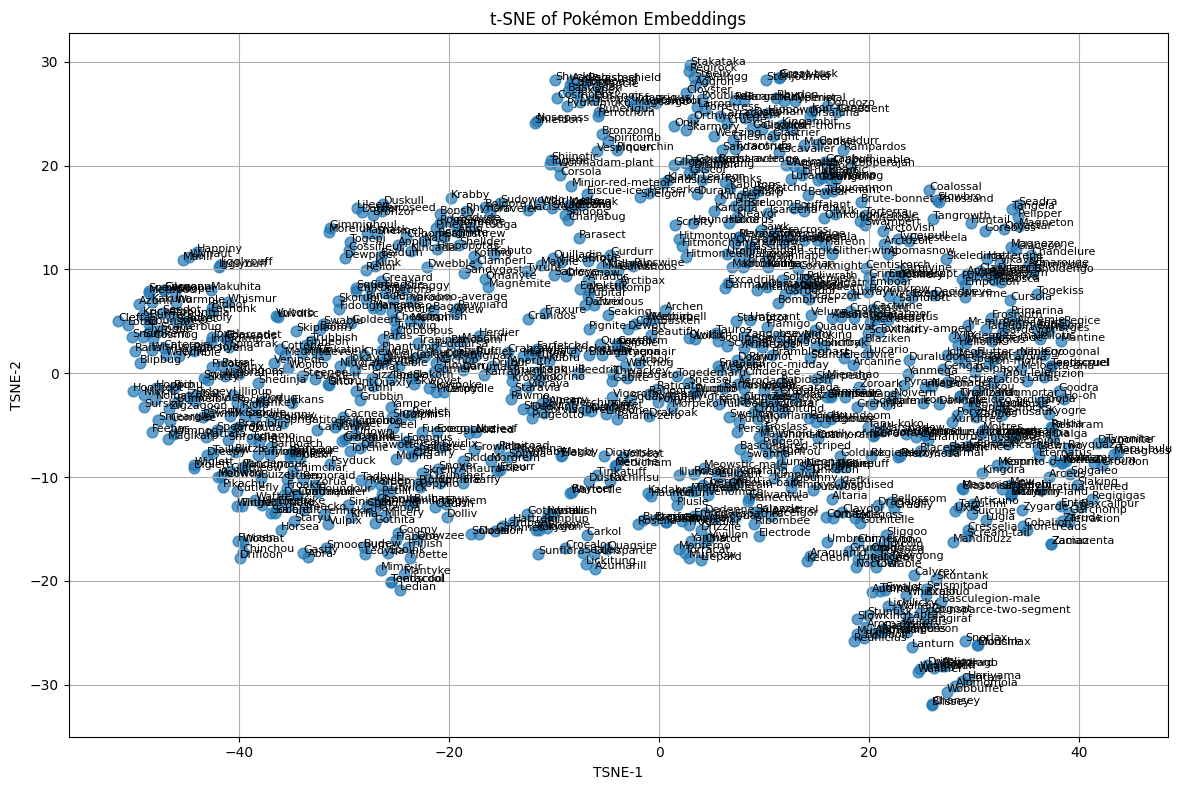

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Step 1: Reduce
dimensions
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(pokemon_stack)

# Step 2: Get Pokémon names (assuming order matches keys in pokemon_vectors)
pokemon_names = list(pokemon_vectors.keys())

# Step 3: Plot
plt.figure(figsize=(12, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], s=60, alpha=0.7)

# Annotate each point with Pokémon name
for i, name in enumerate(pokemon_names):
    plt.text(tsne_result[i, 0], tsne_result[i, 1], name, fontsize=8)

plt.title("t-SNE of Pokémon Embeddings")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
evos = set()

for i in pokemon_names:
  print(i)
  data, evo_data = fetch_pokemon_data(i)
  evolution = parse_evolution_chain(evo_data['chain'])
  evos.add(tuple([i.strip(' ') for i in (evolution.split(('➝')))]))
  # print([i.strip(' ') for i in (evolution.split(('➝')))])
  # stats_df = show_pokemon_stats(data)
  # pokemon_stats = dict(zip(stats_df["Stat"], stats_df["Value"]))
  # pokemon_data[i] = pokemon_stats

Bulbasaur
Ivysaur
Venusaur
Charmander
Charmeleon
Charizard
Squirtle
Wartortle
Blastoise
Caterpie
Metapod
Butterfree
Weedle
Kakuna
Beedrill
Pidgey
Pidgeotto
Pidgeot
Rattata
Raticate
Spearow
Fearow
Ekans
Arbok
Pikachu
Raichu
Sandshrew
Sandslash
Nidoran-f
Nidorina
Nidoqueen
Nidoran-m
Nidorino
Nidoking
Clefairy
Clefable
Vulpix
Ninetales
Jigglypuff
Wigglytuff
Zubat
Golbat
Oddish
Gloom
Vileplume
Paras
Parasect
Venonat
Venomoth
Diglett
Dugtrio
Meowth
Persian
Psyduck
Golduck
Mankey
Primeape
Growlithe
Arcanine
Poliwag
Poliwhirl
Poliwrath
Abra
Kadabra
Alakazam
Machop
Machoke
Machamp
Bellsprout
Weepinbell
Victreebel
Tentacool
Tentacruel
Geodude
Graveler
Golem
Ponyta
Rapidash
Slowpoke
Slowbro
Magnemite
Magneton
Farfetchd
Doduo
Dodrio
Seel
Dewgong
Grimer
Muk
Shellder
Cloyster
Gastly
Haunter
Gengar
Onix
Drowzee
Hypno
Krabby
Kingler
Voltorb
Electrode
Exeggcute
Exeggutor
Cubone
Marowak
Hitmonlee
Hitmonchan
Lickitung
Koffing
Weezing
Rhyhorn
Rhydon
Chansey
Tangela
Kangaskhan
Horsea
Seadra
Goldeen
Seakin

In [ ]:
import random

def random_hex_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

In [ ]:
len(evos)

520

In [ ]:
evolution_colors = {}

for i in evos:
  evolution_colors[random_hex_color()] = i

In [ ]:
len(evolution_colors)

520

In [ ]:
evolution_colors

{'#afd251': ('Lileep', 'Cradily'),
 '#a9843b': ('Regice',),
 '#d0dfbc': ('Gastly', 'Haunter', 'Gengar'),
 '#63a595': ('Uxie',),
 '#b5b542': ('Palkia',),
 '#7a4636': ('Sandygast', 'Palossand'),
 '#65a515': ('Deoxys',),
 '#d4f790': ('Maschiff', 'Mabosstiff'),
 '#e52122': ('Panpour', 'Simipour'),
 '#e819e4': ('Castform',),
 '#8191f3': ('Cherubi', 'Cherrim'),
 '#2f9630': ('Ho-oh',),
 '#8c9572': ('Groudon',),
 '#5fe563': ('Jangmo-o', 'Hakamo-o', 'Kommo-o'),
 '#cca1dd': ('Happiny', 'Chansey', 'Blissey'),
 '#32c4ec': ('Calyrex',),
 '#280495': ('Rowlet', 'Dartrix', 'Decidueye'),
 '#34899d': ('Finneon', 'Lumineon'),
 '#4b9394': ('Oshawott', 'Dewott', 'Samurott'),
 '#62ae14': ('Slakoth', 'Vigoroth', 'Slaking'),
 '#94f23f': ('Heatran',),
 '#a41f7c': ('Chingling', 'Chimecho'),
 '#12ee7b': ('Arctovish',),
 '#16d6fe': ('Oddish', 'Gloom', 'Vileplume'),
 '#a4578a': ('Pinsir',),
 '#b132cb': ('Magikarp', 'Gyarados'),
 '#f1216e': ('Minun',),
 '#965425': ('Volbeat',),
 '#267211': ('Morpeko',),
 '#deca44':

In [ ]:
pokemon_colors = {}
for i in pokemon_names:
  color = next((k for k, v in evolution_colors.items() if i in v), None)
  if color != None:
    pokemon_colors[i] = color
  else:
    pokemon_colors[i] = "#808080"

In [ ]:
pokemon_colors

{'Bulbasaur': '#90b2d9',
 'Ivysaur': '#90b2d9',
 'Venusaur': '#90b2d9',
 'Charmander': '#4a5445',
 'Charmeleon': '#4a5445',
 'Charizard': '#4a5445',
 'Squirtle': '#aeb7d6',
 'Wartortle': '#aeb7d6',
 'Blastoise': '#aeb7d6',
 'Caterpie': '#ba3ad7',
 'Metapod': '#ba3ad7',
 'Butterfree': '#ba3ad7',
 'Weedle': '#ce4ba6',
 'Kakuna': '#ce4ba6',
 'Beedrill': '#ce4ba6',
 'Pidgey': '#bc1600',
 'Pidgeotto': '#bc1600',
 'Pidgeot': '#bc1600',
 'Rattata': '#e860f4',
 'Raticate': '#e860f4',
 'Spearow': '#524c3b',
 'Fearow': '#524c3b',
 'Ekans': '#4cda62',
 'Arbok': '#4cda62',
 'Pikachu': '#c6fd1b',
 'Raichu': '#c6fd1b',
 'Sandshrew': '#b0659c',
 'Sandslash': '#b0659c',
 'Nidoran-f': '#575a9b',
 'Nidorina': '#575a9b',
 'Nidoqueen': '#575a9b',
 'Nidoran-m': '#290f22',
 'Nidorino': '#290f22',
 'Nidoking': '#290f22',
 'Clefairy': '#4be627',
 'Clefable': '#4be627',
 'Vulpix': '#252dd1',
 'Ninetales': '#252dd1',
 'Jigglypuff': '#8857df',
 'Wigglytuff': '#8857df',
 'Zubat': '#c9cc86',
 'Golbat': '#c9cc86',


In [ ]:
import plotly.graph_objects as go

# Prepare data
x = tsne_result[:, 0]
y = tsne_result[:, 1]
names = pokemon_names

# Ensure every Pokémon gets a valid hex color
colors = [pokemon_colors.get(name, "#808080") for name in names]  # Default: gray

# Create the interactive plot
fig = go.Figure(data=go.Scatter(
    x=x,
    y=y,
    mode='markers',
    marker=dict(color=colors, size=10, opacity=0.8),
    text=names,
    hoverinfo='text'
))

fig.update_layout(
    title="t-SNE of Pokémon Embeddings (Colored by Pokémon)",
    xaxis_title="TSNE-1",
    yaxis_title="TSNE-2",
    showlegend=False,
    template="plotly_white"
)

fig.show()

In [ ]:
hover_data = {}

for name in pokemon_names:
    try:
        data, evo_data = fetch_pokemon_data(name)
        stats_df = show_pokemon_stats(data)
        types, abilities = show_types_and_abilities(data)
        evolution = parse_evolution_chain(evo_data['chain'])

        hover_text = f"""
        <b>{name}</b><br>
        Type(s): {', '.join(types)}<br>
        Abilities: {', '.join(abilities)}<br>
        Evolution: {evolution}
        """.strip()

        hover_data[name] = hover_text
    except Exception as e:
        hover_data[name] = f"{name}<br>Error loading data"

In [ ]:
import plotly.graph_objects as go

# Prepare data
x = tsne_result[:, 0]
y = tsne_result[:, 1]
names = pokemon_names

# Ensure every Pokémon gets a valid hex color
colors = [pokemon_colors.get(name, "#808080") for name in names]  # Default: gray

# Generate hover text for each Pokémon
hover_texts = [hover_data.get(name, name) for name in names]

# Create the interactive plot with hover
fig = go.Figure(data=go.Scatter(
    x=x,
    y=y,
    mode='markers',
    marker=dict(color=colors, size=10, opacity=0.8),
    hovertext=hover_texts,
    hoverinfo='text'
))

fig.update_layout(
    title="t-SNE of Pokémon Embeddings (Colored by Pokémon)",
    xaxis_title="TSNE-1",
    yaxis_title="TSNE-2",
    showlegend=False,
    template="plotly_white",
    width=1200,
    height=800
)

fig.write_html("pokemon_plot.html")

fig.show()

In [ ]:
pwd

'/content'

## Pokemon Network Analysis

In [ ]:
pokemon_names = get_pokemon_list(limit=1000)

In [ ]:
pokemon_names[:10]

['Bulbasaur',
 'Ivysaur',
 'Venusaur',
 'Charmander',
 'Charmeleon',
 'Charizard',
 'Squirtle',
 'Wartortle',
 'Blastoise',
 'Caterpie']

In [ ]:
import requests
import time

API_BASE = "https://pokeapi.co/api/v2"
pokemon_names = get_pokemon_list(limit=200)
pokemon_metadata = {}

def safe_get_json(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        return response.json()
    except:
        return None

for name in pokemon_names:
    print(f"Fetching {name}...")
    try:
        data = safe_get_json(f"{API_BASE}/pokemon/{name.lower()}")
        species = safe_get_json(data["species"]["url"]) if data else None

        # Main info
        stats = {s["stat"]["name"]: s["base_stat"] for s in data["stats"]}
        types = [t["type"]["name"] for t in data["types"]]
        abilities = [a["ability"]["name"] for a in data["abilities"]]
        forms = [f["name"] for f in data.get("forms", [])]
        location_area_encounters = safe_get_json(data["location_area_encounters"])
        locations = [loc["location_area"]["name"] for loc in location_area_encounters] if location_area_encounters else []

        # Species-derived info
        evolution_chain = parse_evolution_chain(safe_get_json(species["evolution_chain"]["url"])["chain"]) if species else ""
        egg_groups = [g["name"] for g in species.get("egg_groups", [])] if species else []
        gender_rate = species.get("gender_rate")
        growth_rate = species.get("growth_rate", {}).get("name")
        color = species.get("color", {}).get("name")
        shape = species.get("shape", {}).get("name")
        habitat = species.get("habitat", {}).get("name")
        capture_rate = species.get("capture_rate")
        base_happiness = species.get("base_happiness")

        # Save everything in dictionary
        pokemon_metadata[name] = {
            "id": data["id"],
            "types": types,
            "abilities": abilities,
            "base_stats": stats,
            "forms": forms,
            "locations": locations,
            "evolution_chain": evolution_chain,
            "egg_groups": egg_groups,
            "gender_rate": gender_rate,
            "growth_rate": growth_rate,
            "color": color,
            "shape": shape,
            "habitat": habitat,
            "capture_rate": capture_rate,
            "base_happiness": base_happiness,
        }

        # Rate-limit to avoid hammering the API
        time.sleep(0.25)

    except Exception as e:
        print(f"❌ Error fetching data for {name}: {e}")

Fetching Bulbasaur...
Fetching Ivysaur...
Fetching Venusaur...
Fetching Charmander...
Fetching Charmeleon...
Fetching Charizard...
Fetching Squirtle...
Fetching Wartortle...
Fetching Blastoise...
Fetching Caterpie...
Fetching Metapod...
Fetching Butterfree...
Fetching Weedle...
Fetching Kakuna...
Fetching Beedrill...
Fetching Pidgey...
Fetching Pidgeotto...
Fetching Pidgeot...
Fetching Rattata...
Fetching Raticate...
Fetching Spearow...
Fetching Fearow...
Fetching Ekans...
Fetching Arbok...
Fetching Pikachu...
Fetching Raichu...
Fetching Sandshrew...
Fetching Sandslash...
Fetching Nidoran-f...
Fetching Nidorina...
Fetching Nidoqueen...
Fetching Nidoran-m...
Fetching Nidorino...
Fetching Nidoking...
Fetching Clefairy...
Fetching Clefable...
Fetching Vulpix...
Fetching Ninetales...
Fetching Jigglypuff...
Fetching Wigglytuff...
Fetching Zubat...
Fetching Golbat...
Fetching Oddish...
Fetching Gloom...
Fetching Vileplume...
Fetching Paras...
Fetching Parasect...
Fetching Venonat...
Fetching

In [ ]:
list(pokemon_metadata.keys())[:5]


['Bulbasaur', 'Ivysaur', 'Venusaur', 'Charmander', 'Charmeleon']

In [ ]:
pokemon_metadata['Alakazam']

{'id': 65,
 'types': ['psychic'],
 'abilities': ['synchronize', 'inner-focus', 'magic-guard'],
 'base_stats': {'hp': 55,
  'attack': 50,
  'defense': 45,
  'special-attack': 135,
  'special-defense': 95,
  'speed': 120},
 'forms': ['alakazam'],
 'locations': [],
 'evolution_chain': 'Abra ➝ Kadabra ➝ Alakazam',
 'egg_groups': ['humanshape'],
 'gender_rate': 2,
 'growth_rate': 'medium-slow',
 'color': 'brown',
 'shape': 'humanoid',
 'habitat': 'urban',
 'capture_rate': 50,
 'base_happiness': 70}

In [ ]:
import plotly.graph_objects as go

# Example: Define a color for each Pokémon type
type_colors = {
    "normal": "#A8A878", "fire": "#F08030", "water": "#6890F0", "electric": "#F8D030",
    "grass": "#78C850", "ice": "#98D8D8", "fighting": "#C03028", "poison": "#A040A0",
    "ground": "#E0C068", "flying": "#A890F0", "psychic": "#F85888", "bug": "#A8B820",
    "rock": "#B8A038", "ghost": "#705898", "dragon": "#7038F8", "dark": "#705848",
    "steel": "#B8B8D0", "fairy": "#EE99AC"
}

# Prepare data
x = tsne_result[:, 0]
y = tsne_result[:, 1]
names = pokemon_names

# Assign a color based on the Pokémon's **primary type**
colors = []
for name in names:
    types = pokemon_metadata[name]["types"]
    primary_type = types[0] if types else "normal"
    color = type_colors.get(primary_type, "#808080")  # fallback: gray
    colors.append(color)

# Generate hover text
hover_texts = []
for name in names:
    meta = pokemon_metadata[name]
    text = (
        f"<b>{name}</b><br>"
        f"Type: {', '.join(meta['types'])}<br>"
        f"Abilities: {', '.join(meta['abilities'])}<br>"
        f"Evolution: {meta['evolution_chain']}"
    )
    hover_texts.append(text)

# Create the plot
fig = go.Figure(data=go.Scatter(
    x=x,
    y=y,
    mode='markers',
    marker=dict(color=colors, size=10, opacity=0.85),
    hovertext=hover_texts,
    hoverinfo='text'
))

fig.update_layout(
    title="t-SNE of Pokémon Embeddings (Colored by Primary Type)",
    xaxis_title="TSNE-1",
    yaxis_title="TSNE-2",
    showlegend=False,
    template="plotly_white",
    width=1200,
    height=800
)

# Save and show
fig.write_html("pokemon_plot.html")
fig.show()


In [ ]:
pokemon_vectors = {}

for name, stats in pokemon_metadata.items():
  print(name, np.array(list(stats['base_stats'].values())))
  pokemon_vectors[name] = np.array(list(stats['base_stats'].values()))

pokemon_stack = np.stack(list(pokemon_vectors.values()))

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(pokemon_stack)

Bulbasaur [45 49 49 65 65 45]
Ivysaur [60 62 63 80 80 60]
Venusaur [ 80  82  83 100 100  80]
Charmander [39 52 43 60 50 65]
Charmeleon [58 64 58 80 65 80]
Charizard [ 78  84  78 109  85 100]
Squirtle [44 48 65 50 64 43]
Wartortle [59 63 80 65 80 58]
Blastoise [ 79  83 100  85 105  78]
Caterpie [45 30 35 20 20 45]
Metapod [50 20 55 25 25 30]
Butterfree [60 45 50 90 80 70]
Weedle [40 35 30 20 20 50]
Kakuna [45 25 50 25 25 35]
Beedrill [65 90 40 45 80 75]
Pidgey [40 45 40 35 35 56]
Pidgeotto [63 60 55 50 50 71]
Pidgeot [ 83  80  75  70  70 101]
Rattata [30 56 35 25 35 72]
Raticate [55 81 60 50 70 97]
Spearow [40 60 30 31 31 70]
Fearow [ 65  90  65  61  61 100]
Ekans [35 60 44 40 54 55]
Arbok [60 95 69 65 79 80]
Pikachu [35 55 40 50 50 90]
Raichu [ 60  90  55  90  80 110]
Sandshrew [50 75 85 20 30 40]
Sandslash [ 75 100 110  45  55  65]
Nidoran-f [55 47 52 40 40 41]
Nidorina [70 62 67 55 55 56]
Nidoqueen [90 92 87 75 85 76]
Nidoran-m [46 57 40 40 40 50]
Nidorino [61 72 57 55 55 65]
Nidokin

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [ ]:
import networkx as nx

# Build a directed evolution graph
G = nx.DiGraph()

for name, data in pokemon_metadata.items():
    chain_str = data.get("evolution_chain")
    if not chain_str or "➝" not in chain_str:
        continue

    mons = [mon.strip() for mon in chain_str.split("➝")]

    for mon in mons:
        if mon in pokemon_metadata:
            pdata = pokemon_metadata[mon]
            G.add_node(mon,
                       types=', '.join(pdata.get("types", [])),
                       color=pdata.get("color", "gray"),
                       habitat=pdata.get("habitat", "unknown"))

    for i in range(len(mons) - 1):
        if mons[i] in G and mons[i + 1] in G:
            G.add_edge(mons[i], mons[i + 1], relation="evolves_to")

In [ ]:
# Assign a color to each type
type_color_map = {
    "normal": "#A8A77A",
    "fire": "#EE8130",
    "water": "#6390F0",
    "electric": "#F7D02C",
    "grass": "#7AC74C",
    "ice": "#96D9D6",
    "fighting": "#C22E28",
    "poison": "#A33EA1",
    "ground": "#E2BF65",
    "flying": "#A98FF3",
    "psychic": "#F95587",
    "bug": "#A6B91A",
    "rock": "#B6A136",
    "ghost": "#735797",
    "dragon": "#6F35FC",
    "dark": "#705746",
    "steel": "#B7B7CE",
    "fairy": "#D685AD"
}


import plotly.graph_objects as go
import networkx as nx

# Create a directed graph
# G = nx.DiGraph()

# Compute graph layout
pos = nx.spring_layout(G, seed=42, k=0.8)

# Create edge traces
edge_x = []
edge_y = []
for src, tgt in G.edges():
    x0, y0 = pos[src]
    x1, y1 = pos[tgt]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Create node traces
node_x = []
node_y = []
node_text = []
node_color = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

    pdata = pokemon_metadata[node]
    text = f"<b>{node}</b><br>Type: {', '.join(pdata['types'])}<br>Color: {pdata['color']}<br>Habitat: {pdata['habitat']}"
    node_text.append(text)
    primary_type = pdata['types'][0].lower() if pdata['types'] else "unknown"
    color = type_color_map.get(primary_type, "#888888")  # fallback gray
    node_color.append(color)


node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode='markers+text',
    text=list(G.nodes()),
    textposition='top center',
    hovertext=node_text,
    hoverinfo='text',
    marker=dict(
        size=14,
        color=node_color,
        line=dict(width=1, color='black')
    )
)

# Build figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title=dict(text="Pokémon Evolution Network", font=dict(size=20)),
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False, visible=False),
                    yaxis=dict(showgrid=False, zeroline=False, visible=False)
                ))
fig.write_html("pokemon_evo_network.html")
fig.update_layout(height=800, width=1000)
fig.show()

In [ ]:
import networkx as nx
import plotly.graph_objects as go
from collections import defaultdict

# Step 1: Build undirected graph where edge = same habitat
G = nx.Graph()

# Group Pokémon by habitat
habitat_groups = defaultdict(list)
for name, data in pokemon_metadata.items():
    habitat = data.get("habitat", None)
    if habitat:
        habitat_groups[habitat].append(name)

# Add edges for Pokémon that share a habitat
for habitat, mons in habitat_groups.items():
    for i in range(len(mons)):
        for j in range(i + 1, len(mons)):
            G.add_edge(mons[i], mons[j], habitat=habitat)

# Add metadata to each node
for name in G.nodes():
    pdata = pokemon_metadata[name]
    G.nodes[name]["types"] = ', '.join(pdata.get("types", []))
    G.nodes[name]["color"] = pdata.get("color", "gray")
    G.nodes[name]["habitat"] = pdata.get("habitat", "unknown")

# Step 2: Layout for plotting
pos = nx.spring_layout(G, seed=42, k=1)

# Step 3: Create edge trace
edge_x = []
edge_y = []
for src, tgt in G.edges():
    x0, y0 = pos[src]
    x1, y1 = pos[tgt]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1, color='#bbb'),
    hoverinfo='none',
    mode='lines'
)

# Step 4: Create node trace
node_x = []
node_y = []
node_text = []
node_color = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

    pdata = G.nodes[node]
    hover = f"<b>{node}</b><br>Habitat: {pdata['habitat']}<br>Type: {pdata['types']}<br>Color: {pdata['color']}"
    node_text.append(hover)
    type_list = pdata.get("types", "").split(', ')
    primary_type = type_list[0].lower() if type_list else "unknown"
    color = type_color_map.get(primary_type, "#888888")
    node_color.append(color)


node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode='markers+text',
    text=list(G.nodes()),
    textposition='top center',
    hovertext=node_text,
    hoverinfo='text',
    marker=dict(
        size=14,
        color=node_color,
        line=dict(width=1, color='black')
    )
)

# Step 5: Assemble Plotly figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title=dict(text="Pokémon Habitat Network", font=dict(size=20)),
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False, visible=False),
                    yaxis=dict(showgrid=False, zeroline=False, visible=False)
                ))

fig.update_layout(height=1600, width=2000)
fig.show()

In [ ]:
pip install python-louvain

In [ ]:
import networkx as nx
import plotly.graph_objects as go
import community.community_louvain as community_louvain  # FIXED
from collections import defaultdict
import matplotlib.cm as cm
import matplotlib.colors as mcolors


# Step 1: Build habitat-based undirected graph
G = nx.Graph()

# Group Pokémon by habitat
habitat_groups = defaultdict(list)
for name, data in pokemon_metadata.items():
    habitat = data.get("habitat", None)
    if habitat:
        habitat_groups[habitat].append(name)

# Add edges between Pokémon that share a habitat
for habitat, mons in habitat_groups.items():
    for i in range(len(mons)):
        for j in range(i + 1, len(mons)):
            G.add_edge(mons[i], mons[j], habitat=habitat)

# Add node metadata
for name in G.nodes():
    pdata = pokemon_metadata[name]
    G.nodes[name]["types"] = ', '.join(pdata.get("types", []))
    G.nodes[name]["color"] = pdata.get("color", "gray")
    G.nodes[name]["habitat"] = pdata.get("habitat", "unknown")

# Step 2: Louvain community partition
partition = community_louvain.best_partition(G)

# Assign each community a color
communities = sorted(set(partition.values()))
color_map = cm.get_cmap('tab20', len(communities))
community_colors = {comm: mcolors.to_hex(color_map(i)) for i, comm in enumerate(communities)}

# Step 3: Layout for Plotly
pos = nx.spring_layout(G, seed=42, k=1.0)

# Edge traces
edge_x = []
edge_y = []
for src, tgt in G.edges():
    x0, y0 = pos[src]
    x1, y1 = pos[tgt]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1, color='#bbb'),
    hoverinfo='none',
    mode='lines'
)

# Node traces
node_x = []
node_y = []
node_text = []
node_color = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

    pdata = G.nodes[node]
    community_id = partition.get(node, -1)
    hover = f"<b>{node}</b><br>Community: {community_id}<br>Habitat: {pdata['habitat']}<br>Type: {pdata['types']}"
    node_text.append(hover)

    color = community_colors.get(community_id, "#888888")
    node_color.append(color)

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode='markers+text',
    text=list(G.nodes()),
    textposition='top center',
    hovertext=node_text,
    hoverinfo='text',
    marker=dict(
        size=14,
        color=node_color,
        line=dict(width=1, color='black')
    )
)

# Step 4: Assemble figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title=dict(text="Pokémon Habitat Network (Louvain Communities)", font=dict(size=20)),
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False, visible=False),
                    yaxis=dict(showgrid=False, zeroline=False, visible=False)
                ))

fig.write_html("pokemon_network.html")
fig.update_layout(height=800, width=1000)
fig.show()

/tmp/ipython-input-54-721868175.py:37: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



In [ ]:
hover_data = {}

for name in pokemon_names:
    try:
        data, evo_data = fetch_pokemon_data(name)
        stats_df = show_pokemon_stats(data)
        types, abilities = show_types_and_abilities(data)
        evolution = parse_evolution_chain(evo_data['chain'])

        hover_text = f"""
        <b>{name}</b><br>
        Type(s): {', '.join(types)}<br>
        Abilities: {', '.join(abilities)}<br>
        Evolution: {evolution}
        """.strip()

        hover_data[name] = hover_text
    except Exception as e:
        hover_data[name] = f"{name}<br>Error loading data"

In [ ]:
import plotly.graph_objects as go

# Prepare data
x = tsne_result[:, 0]
y = tsne_result[:, 1]
names = pokemon_names

# Color each Pokémon based on its community partition
colors = [
    community_colors.get(partition.get(name, -1), "#808080")
    for name in names
]

# Generate hover text for each Pokémon
hover_texts = [hover_data.get(name, name) for name in names]

# Create the interactive plot with hover
fig = go.Figure(data=go.Scatter(
    x=x,
    y=y,
    mode='markers',
    marker=dict(color=colors, size=10, opacity=0.8),
    hovertext=hover_texts,
    hoverinfo='text'
))

fig.update_layout(
    title="t-SNE of Pokémon Embeddings (Colored by Louvain Communities)",
    xaxis_title="TSNE-1",
    yaxis_title="TSNE-2",
    showlegend=False,
    template="plotly_white"
)
fig.write_html("pokemon_tsne_louvain.html")
fig.update_layout(height=800, width=1000)
fig.show()
